## Comparing Long Term Investment Strategies
### Karandeep Singh

Investments are critical to long term financial security. Through the power of compound interest, investors can grow their wealth over time. However, there are many different investment strategies that can be used to grow wealth.

In this analysis, we will compare the benefits of investing in:
- Equities in the Largest Economy (US)
- Local Equities (Singapore)
- Emerging Market Equities (India)
- Safe Assets (Gold)
- Low Risk Assets (US Treasury Bonds)
- Professional Management (Mutual Funds)

**The goal of this analysis is to determine which investment strategies are the most effective in growing wealth over time.**

Insights I hope to gain from this analysis include:

1. What benefits does investing offer, compared to holding cash?
2. Which investment vehicles are the most effective in growing wealth over time?
3. Which investment vehicles offer the best risk-adjusted returns?
4. Which investment vehicles are the most volatile?
5. Are developing countries likely to outperform developed countries in the long run?
6. Does GDP growth translate to stock market growth?

This analysis makes use of the following datasets:
- [SPDR S&P 500 ETF Trust (SPY) Historical Prices](https://finance.yahoo.com/quote/SPY/history?period1=1659308442&period2=1690844442&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true)
- [Bitcoin USD (BTC-USD) Historical Prices](https://finance.yahoo.com/quote/BTC-USD/history?period1=1659322815&period2=1690858815&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true)
- [FTSE Straits Times Index STI Historical Prices](https://www.wsj.com/market-data/quotes/index/SG/STI/historical-prices)
- [NIFTY Indices Dataset](https://www.kaggle.com/datasets/sudalairajkumar/nifty-indices-dataset)
- [Gold Spot Prices](https://www.gold.org/goldhub/data/gold-prices)
- [U.S. Department of the Treasury - Interest Rates Data CSV Archive](https://home.treasury.gov/interest-rates-data-csv-archive)
- [Fidelity Growth Company Fund Historical Quotes](https://www.marketwatch.com/investing/fund/fdgrx/download-data)
- [Singapore Department of Statistics - Consumer Price Index (CPI), 2019 As Base Year](https://tablebuilder.singstat.gov.sg/table/TS/M212881)
- [U.S. Bureau of Labor Statistics - Consumer Price Index for All Urban Consumers](https://www.bls.gov/cpi/tables/supplemental-files/)
- [Singapore Dollars to U.S. Dollar Spot Exchange Rate](https://fred.stlouisfed.org/series/DEXSIUS)
- [Indian Rupees to U.S. Dollar Spot Exchange Rate](https://fred.stlouisfed.org/series/EXINUS)

In [1]:
# Importing required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

### Loading and Preprocessing the Datasets

In [2]:
class ParsedDataFrames:
    spy_data = None
    btc_data = None
    sti_data = None
    nifty_data = None
    gold_data = None
    bond_data = None
    mf_data = None
    sg_cpi_data = None
    us_cpi_data = None

data = ParsedDataFrames()

Later, we'll be using data in United States Dollars, Singapore Dollars and Indian Rupees.

The ***Singapore Dollars to U.S. Dollar Spot Exchange Rate*** and ***Indian Rupees to U.S. Dollar Spot Exchange Rate*** datasets allow us to compare this data correctly. They contain the exchange rates for USDSGD and USDINR respectively.

The USDINR dataset, however, does not contain values for every single day, and we thus need to forward fill them ourselves.

In [3]:
usd_sgd = pd.read_csv('data/DEXSIUS.csv', parse_dates=True)
usd_sgd.columns = ['Date', 'Close']
# Some values of Close are ".", so we need to convert them to NaN to be forward filled
usd_sgd['Close'] = usd_sgd['Close'].replace('.', np.nan)
usd_sgd['Close'] = usd_sgd['Close'].fillna(method='ffill') # Forward fill the NaN values
usd_sgd['Close'] = usd_sgd['Close'].astype(float) # Convert Close to float
usd_sgd.tail()

,Date,Close
11101,2023-07-24,1.3300
11102,2023-07-25,1.3277
11103,2023-07-26,1.3266
11104,2023-07-27,1.3293
11105,2023-07-28,1.3305


In [4]:
usd_inr = pd.read_csv('data/EXINUS.csv', parse_dates=True)
usd_inr.columns = ['Date', 'Close']
usd_inr['Close'] = usd_inr['Close'].astype(float)

# Create a row for each day
usd_inr['Date'] = pd.to_datetime(usd_inr['Date'])
usd_inr = usd_inr.resample('D', on='Date').mean()
usd_inr = usd_inr.fillna(method='ffill')
usd_inr = usd_inr.reset_index()

usd_inr.tail()

,Date,Close
18409,2023-05-28,82.2977
18410,2023-05-29,82.2977
18411,2023-05-30,82.2977
18412,2023-05-31,82.2977
18413,2023-06-01,82.2252


The ***SPDR S&P 500 ETF Trust (SPY) Historical Prices*** dataset contains the historical prices of the SPY ETF. This is a fund that tracks the performance of the 500 largest companies in the USA. It is the most commonly used proxy for the entire US stock market.

We can discard all columns apart from the date and the adjusted close, which is the price of the ETF at the end of each trading day and adjusted for dividends and stock splits. A stock split is a process where a single share is split into multiple shares, which reduces the price of each share and can cause our data to be incorrect unless we adjust for it.

In [5]:
spy_data = pd.read_csv('data/SPY.csv')
spy_data = spy_data[['Date', 'Adj Close']]
# Date is formatted as yyyy-mm-dd, convert to datetime
spy_data['Date'] = pd.to_datetime(spy_data['Date'])

data.spy_data = spy_data
data.spy_data.head()

,Date,Adj Close
0,1993-01-29,25.029373
1,1993-02-01,25.207396
2,1993-02-02,25.260807
3,1993-02-03,25.527821
4,1993-02-04,25.634634


The ***FTSE Straits Times Index STI Historical Prices*** dataset contains the historical prices of the Straits Times Index (STI) from 2000 to 2019. Like SPY, STI is an index that can be used as a proxy for the Singapore stock market. It tracks the 30 largest companies listed on the Singapore Exchange (SGX).

STI has never had a stock split, so the price data does not need to be adjusted. However, we need to convert it to USD for a fair comparison with the other datasets.

In [6]:
sti_data = pd.read_csv('data/STI.csv')
sti_data = sti_data[['Date', ' Close']]
sti_data.columns = ['Date', 'Close']

# Date is formatted as mm/dd/yy, convert to datetime
sti_data['Date'] = pd.to_datetime(sti_data['Date'], format='%m/%d/%y')

# Convert to USD
sti_data['Close'] = sti_data['Close'] / usd_sgd['Close']

data.sti_data = sti_data
data.sti_data.head()

,Date,Close
0,2023-07-31,1612.030578
1,2023-07-28,1619.975973
2,2023-07-27,1604.528846
3,2023-07-26,1588.923077
4,2023-07-25,1578.746097


The ***NIFTY50*** is the flagship index on the National Stock Exchange of India Ltd. (NSE). It includes 50 of India's top companies and is a good proxy for the Indian stock market. We use the Indian stock market as our benchmark for emerging markets because of its size, liquidity, and ease of access for foreign investors.

While China's equity market is larger, foreign investors are not allowed to own Chinese stocks and instead invest in them through a special corporate structure called a variable interest entity (VIE). This is legally a grey area and investors have no ownership rights in the underlying companies. As a result, we do not consider China's equity market as a viable benchmark for emerging markets for this analysis, although some investors may choose to take a different view. For more on this topic, see [this article from CNN Business](https://edition.cnn.com/2021/08/08/investing/stocks-week-ahead/index.html).

This analysis uses two separate datasets for NIFTY50. This is because the first dataset only contains values from 2000-2020, while the second only contains values from 2007-2023. We need to add the rows from the second dataset to the first to create a dataset with values from 2000-2023.

The prices need to be converted to USD for a fair comparison with the other datasets.

In [7]:
nifty_data = pd.read_csv('data/NIFTY50.csv')
nifty_data = nifty_data[['Date', 'Close']]
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'], format='%Y-%m-%d')
# Remove post-2021 data because it's not complete
nifty_data = nifty_data[nifty_data['Date'] < '2021-01-01']
data.nifty_data = nifty_data

nifty_data = pd.read_csv('data/^NSEI.csv')
# Remove all pre-2021 data
nifty_data = nifty_data[nifty_data['Date'] >= '2021-01-01']

# Format data to match NIFTY50.csv
nifty_data = nifty_data[['Date', 'Close']]
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'], format='%Y-%m-%d')

# Combine datasets
nifty_data = pd.concat([data.nifty_data, nifty_data])
nifty_data = nifty_data.reset_index(drop=True)

print(usd_inr.tail())
print(nifty_data.head())
print(nifty_data.tail())

nifty_data['Close'] = nifty_data['Close'] / usd_inr['Close']

data.nifty_data = nifty_data
data.nifty_data.tail()

print(nifty_data.head())
print(nifty_data.tail())

            Date    Close
18409 2023-05-28  82.2977
18410 2023-05-29  82.2977
18411 2023-05-30  82.2977
18412 2023-05-31  82.2977
18413 2023-06-01  82.2252
        Date   Close
0 2000-01-03  1592.2
1 2000-01-04  1638.7
2 2000-01-05  1595.8
3 2000-01-06  1617.6
4 2000-01-07  1613.3
           Date         Close
5863 2023-07-28  19646.050781
5864 2023-07-31  19753.800781
5865 2023-08-01  19733.550781
5866 2023-08-02  19526.550781
5867 2023-08-03  19381.650391
        Date       Close
0 2000-01-03  198.923052
1 2000-01-04  204.732575
2 2000-01-05  199.372821
3 2000-01-06  202.096426
4 2000-01-07  201.559201
           Date        Close
5863 2023-07-28  1301.709510
5864 2023-07-31  1308.848818
5865 2023-08-01  1307.507092
5866 2023-08-02  1293.791670
5867 2023-08-03  1284.190849


The ***Gold Spot Prices*** dataset records gold prices (per ounce) from 1978 to 2023. Gold is often used as a hedge against inflation and is considered a safe haven asset due to its scarcity and its value in jewelry and electronics. This low risk profile makes gold a popular choice during times of economic uncertainty.

Unlike most of the other datasets, this is provided as a Microsoft Excel workbook with multiple sheets.

For maximum precision and granularity, we will use the "Daily" sheet, as this contains daily prices. The first 5 rows contain metadata, so we will skip them. The first 2 columns are empty and purely for formatting, so we will skip them as well. The remaining columns contain the Date, and the prices in various currencies. We will only use the USD column for a more consistent comparison with the other datasets.

In [8]:
gold_data = pd.read_excel('data/GoldSpotPrices.xlsx', sheet_name='Daily', skiprows=5, index_col=2)
gold_data = gold_data.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1)
gold_data = gold_data.iloc[:, 0:1]
# The index is already in datetime format, but needs to be converted to a regular column
gold_data.reset_index(level=0, inplace=True)
gold_data.columns = ['Date', 'Close']

data.gold_data = gold_data
data.gold_data.head()

,Date,Close
0,1978-12-29,226.00
1,1979-01-01,226.00
2,1979-01-02,226.80
3,1979-01-03,218.60
4,1979-01-04,223.15


The ***U.S. Department of the Treasury - Interest Rates Data CSV Archive*** contains data about US Treasury Bill interest rates. T-Bills are a financial instrument that the U.S Government uses to control the amount of money in circulation. Investors buy T-Bills from the government at a discount to the face value (the amount that the government will pay back when the T-Bill matures). The difference between the face value and the purchase price is the interest that the investor earns when the T-Bill matures.

T-Bills are considered risk-free investments because the US Government is extremely unlikely to default on its loans. They are sold at different lengths of time to maturity, from 4 to 52 weeks. Longer maturities generally pay higher interest rates, as investors demand more compensation for the risk of holding the investment for a longer period of time. We will hence consider only the 52 week T-Bill for our analysis as it is the longest maturity available.

However, there are two columns for 52 week bills - "52 WEEKS BANK DISCOUNT" and "52 WEEKS COUPON EQUIVALENT". T-Bills only pay out at the end of the investment, and this is what the former represents. The latter is the equivalent interest rate that the investor would earn if the T-Bill paid interest every 6 months. To avoid confusion, we will stick with the "52 WEEKS BANK DISCOUNT" column.

In [9]:
bond_data = pd.read_csv('data/US-Treasury.csv')
bond_data['Date'] = pd.to_datetime(bond_data['Date'], format='%m/%d/%y')
bond_data = bond_data[['Date', '52 WEEKS BANK DISCOUNT']]

data.bond_data = bond_data
data.bond_data.head()

,Date,52 WEEKS BANK DISCOUNT
0,2021-12-31,0.38
1,2021-12-30,0.37
2,2021-12-29,0.38
3,2021-12-28,0.38
4,2021-12-27,0.30


The ***Fidelity Growth Company Fund Historical Quotes*** dataset contains the historical stock prices of the Fidelity Growth Company Fund from 2000 to 2022. The Fidelity Growth Company Fund is a professionally managed mutual fund that invests in companies that are expected to grow faster than the rest of the market. Investors invest in mutual funds hoping to earn higher returns with the help of professional fund managers.

The dataset is split into 22 CSV files, one for each year.

In [10]:
mf_files = []
for i in range (0, 23):
    # Files are named for the last 2 digits of the year, make sure to add 0 to single digit years
    mf_files.append(pd.read_csv('data/Fidelity/' + str(i).zfill(2) + '.csv'))
mf_data = pd.concat(mf_files, ignore_index=True)
mf_data = mf_data[['Date', 'Close']]
mf_data['Date'] = pd.to_datetime(mf_data['Date'], format='%m/%d/%Y')

data.mf_data = mf_data
data.mf_data.head()

,Date,Close
0,2000-12-29,7.14
1,2000-12-28,7.30
2,2000-12-27,7.22
3,2000-12-26,7.08
4,2000-12-22,7.04


The ***Singapore Department of Statistics - Consumer Price Index (CPI), 2019 As Base Year*** dataset contains the monthly consumer price index (CPI) from 1961 to 2023. CPI is a measure of inflation, and is calculated by measuring the change in price of a fixed basket of goods and services, including food, power, and rent.

If an investor holds cash without earning interest and the CPI is rising, the investor's purchasing power is decreasing, which can be considered as a loss of money.

The first 10 rows of the dataset contain metadata and will be skipped. This dataset is arranged such that the dates are in columns and the CPI values are in rows. For consistency, the dataset will be transposed so that the dates are in rows and the CPI values are in columns. We will also consider only the "All Items" category, which is the overall CPI.

In [11]:
sg_cpi_data = pd.read_csv('data/SG-CPI.csv', skiprows=10)
sg_cpi_data = sg_cpi_data.T # Transpose
sg_cpi_data = sg_cpi_data.iloc[:, :1] # Keep only the first column (All Items)
sg_cpi_data.columns = sg_cpi_data.iloc[0] # Set column names to the first row
sg_cpi_data = sg_cpi_data.iloc[1:, :] # Remove the first row
sg_cpi_data.index = sg_cpi_data.index.str.strip()
sg_cpi_data.index = pd.to_datetime(sg_cpi_data.index, format='%Y %b')

data.sg_cpi_data = sg_cpi_data
data.sg_cpi_data.head()

Data Series,All Items
2023-06-01,113.576
2023-05-01,113.034
2023-04-01,112.669
2023-03-01,112.583
2023-02-01,112.019


The ***U.S. Bureau of Labor Statistics - Consumer Price Index for All Urban Consumers*** dataset contains U.S. CPI data from 1913 to 2023. Since many of our datasets are in USD, it is important to also track how the USD is changing in value over time.

This dataset is provided as a Microsoft Excel workbook, where the first 11 rows are metadata and will be skipped.

In [12]:
us_cpi_data = pd.read_excel('data/USA-CPI.xlsx', skiprows=11, usecols=range(13))
us_cpi_data = us_cpi_data.melt(id_vars=['Year'], var_name='Month', value_name='CPI')
us_cpi_data['Date'] = us_cpi_data['Year'].astype(str) + '-' + us_cpi_data['Month']
us_cpi_data['Date'] = pd.to_datetime(us_cpi_data['Date'], format='%Y-%b')
us_cpi_data = us_cpi_data.drop(columns=['Year', 'Month'])

data.us_cpi_data = us_cpi_data
data.us_cpi_data.head()

/Users/karandeepsingh/miniforge3/envs/pds/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,CPI,Date
0,9.8,1913-01-01
1,10.0,1914-01-01
2,10.1,1915-01-01
3,10.4,1916-01-01
4,11.7,1917-01-01


### 1. What benefits does investing offer, compared to holding cash?

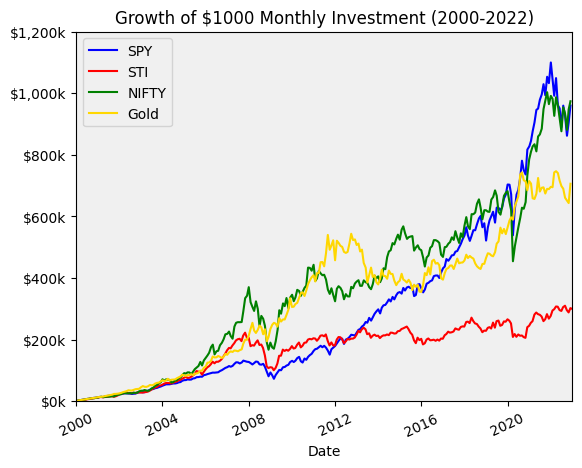

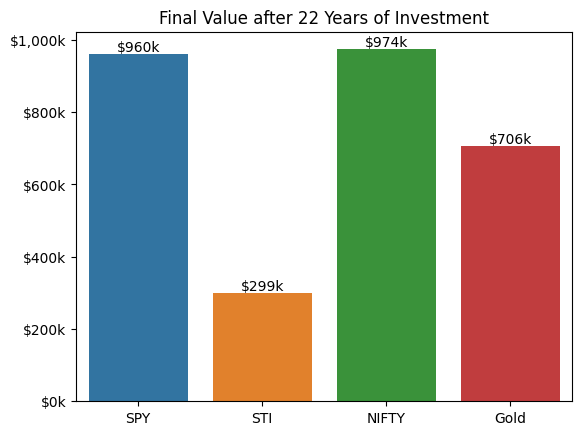

In [17]:
# Assume the investor started investing in 2000, and contributed 1000 USD every month.

total_spy_shares = [0]
total_spy_value = [0]

total_sti_shares = [0]
total_sti_value = [0]

total_nifty_shares = [0]
total_nifty_value = [0]

total_gold = [0]
total_gold_value = [0]

for year in range(2000, 2023):
    for month in range(1, 13):
        # SPY
        num_spy_shares = 1000 / data.spy_data.loc[(data.spy_data['Date'].dt.year == year) & (data.spy_data['Date'].dt.month == month)]['Adj Close'].values[0]
        total_spy_shares.append(total_spy_shares[-1] + num_spy_shares)
        price = data.spy_data.loc[(data.spy_data['Date'].dt.year == year) & (data.spy_data['Date'].dt.month == month)]['Adj Close'].values[0]
        value = total_spy_shares[-1] * price
        total_spy_value.append(value)
        # STI
        num_sti_shares = 1000 / data.sti_data.loc[(data.sti_data['Date'].dt.year == year) & (data.sti_data['Date'].dt.month == month)]['Close'].values[0]
        total_sti_shares.append(total_sti_shares[-1] + num_sti_shares)
        price = data.sti_data.loc[(data.sti_data['Date'].dt.year == year) & (data.sti_data['Date'].dt.month == month)]['Close'].values[0]
        value = total_sti_shares[-1] * price
        total_sti_value.append(value)
        # NIFTY
        num_nifty_shares = 1000 / data.nifty_data.loc[(data.nifty_data['Date'].dt.year == year) & (data.nifty_data['Date'].dt.month == month)]['Close'].values[0]
        total_nifty_shares.append(total_nifty_shares[-1] + num_nifty_shares)
        price = data.nifty_data.loc[(data.nifty_data['Date'].dt.year == year) & (data.nifty_data['Date'].dt.month == month)]['Close'].values[0]
        value = total_nifty_shares[-1] * price
        total_nifty_value.append(value)
        # Gold
        num_gold = 1000 / data.gold_data.loc[(data.gold_data['Date'].dt.year == year) & (data.gold_data['Date'].dt.month == month)]['Close'].values[0]
        total_gold.append(total_gold[-1] + num_gold)
        price = data.gold_data.loc[(data.gold_data['Date'].dt.year == year) & (data.gold_data['Date'].dt.month == month)]['Close'].values[0]
        value = total_gold[-1] * price
        total_gold_value.append(value)

spy_data_2000_2022 = data.spy_data.loc[(data.spy_data['Date'].dt.year >= 2000) & (data.spy_data['Date'].dt.year <= 2022)]
spy_data_2000_2022 = data.spy_data.groupby([spy_data_2000_2022['Date'].dt.year, spy_data_2000_2022['Date'].dt.month]).first()

sti_data_2000_2022 = data.sti_data.loc[(data.sti_data['Date'].dt.year >= 2000) & (data.sti_data['Date'].dt.year <= 2022)]
sti_data_2000_2022 = data.sti_data.groupby([sti_data_2000_2022['Date'].dt.year, sti_data_2000_2022['Date'].dt.month]).first()

nifty_data_2000_2022 = data.nifty_data.loc[(data.nifty_data['Date'].dt.year >= 2000) & (data.nifty_data['Date'].dt.year <= 2022)]
nifty_data_2000_2022 = data.nifty_data.groupby([nifty_data_2000_2022['Date'].dt.year, nifty_data_2000_2022['Date'].dt.month]).first()

gold_data_2000_2022 = data.gold_data.loc[(data.gold_data['Date'].dt.year >= 2000) & (data.gold_data['Date'].dt.year <= 2022)]
gold_data_2000_2022 = data.gold_data.groupby([gold_data_2000_2022['Date'].dt.year, gold_data_2000_2022['Date'].dt.month]).first()

plt.rcParams['axes.facecolor'] = 'F0F0F0'

sns.lineplot(x=spy_data_2000_2022['Date'], y=total_spy_value[1:], color="blue", label='SPY')
sns.lineplot(x=sti_data_2000_2022['Date'], y=total_sti_value[1:], color="red", label='STI')
sns.lineplot(x=nifty_data_2000_2022['Date'], y=total_nifty_value[1:], color="green", label='NIFTY')
sns.lineplot(x=gold_data_2000_2022['Date'], y=total_gold_value[1:], color="gold", label='Gold')

plt.ylim(0, 1200000)
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2022-12-31'))
plt.xticks(rotation=25)
plt.title('Growth of $1000 Monthly Investment (2000-2022)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}'.format(x/1000) + 'k')) # Format y-axis ticks in 100k increments
plt.show()

# bar chart of total value
plt.rcParams['axes.facecolor'] = 'FFFFFF'
sns.barplot(x=['SPY', 'STI', 'NIFTY', 'Gold'], y=[total_spy_value[-1], total_sti_value[-1], total_nifty_value[-1], total_gold_value[-1]])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}'.format(x/1000) + 'k')) # Format y-axis ticks in 100k increments
# show the value of each bar
for index, value in enumerate([total_spy_value[-1], total_sti_value[-1], total_nifty_value[-1], total_gold_value[-1]]):
    plt.text(index, value, '${:,.0f}'.format(value/1000) + 'k', ha='center', va='bottom')
plt.title('Final Value after 22 Years of Investment')
plt.show()

### Important Considerations
- In our analysis, we assumed that the investor paid $0 in fees and commissions, and that they had the ability to purchase fractional shares. However, zero commission trading and fractional shares are both relatively new developments.
